In [49]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler 
from mpl_toolkits.mplot3d import Axes3D 
 
data = pd.read_csv(r"C:\Users\user\OneDrive\Desktop\projects\ML_Labs\tp3\HousingData.csv") 
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


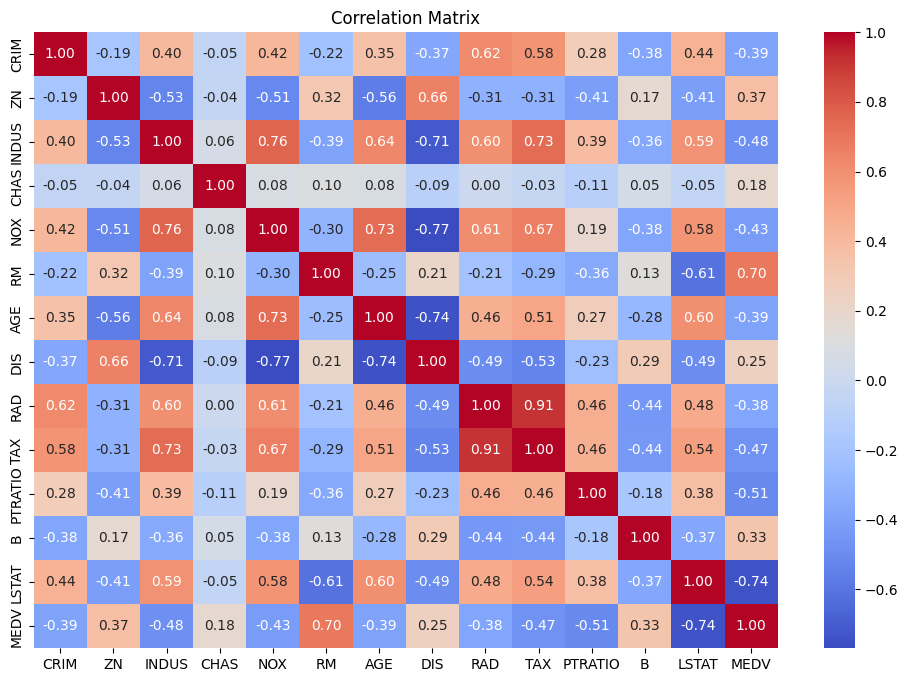

In [50]:

correlation_matrix = data.corr() 
plt.figure(figsize=(12, 8)) 
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f") 
plt.title("Correlation Matrix") 
plt.show() 


# 2.

In [51]:
 
target = 'MEDV' 
highly_corr_features = correlation_matrix[target][abs(correlation_matrix[target]) > 0.6].index 
highly_corr_data = data[highly_corr_features] 
 
print("Highly correlated features with MEDV (threshold > 0.6):", highly_corr_features.tolist()) 


Highly correlated features with MEDV (threshold > 0.6): ['RM', 'LSTAT', 'MEDV']


# 3.

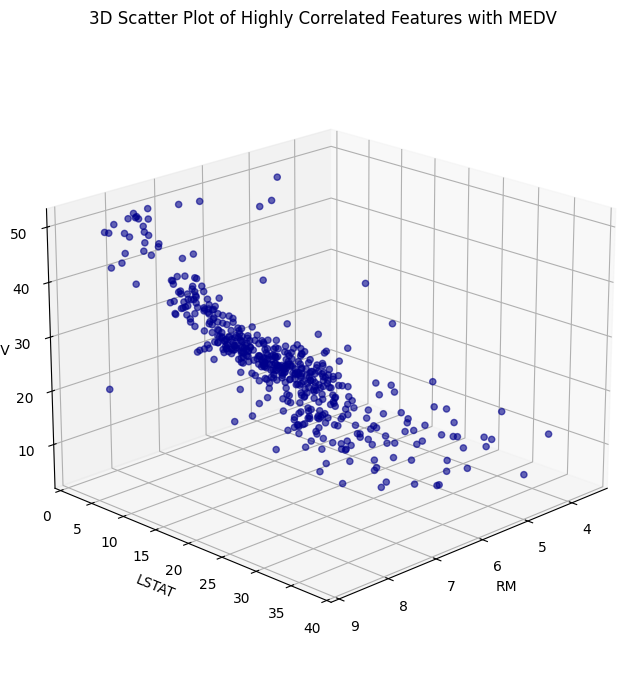

In [52]:
if len(highly_corr_features) == 3:  
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(highly_corr_data[highly_corr_features[0]], 
                        highly_corr_data[highly_corr_features[1]], 
                        data[target], 
                        c='darkblue', 
                        marker='o',
                        alpha=0.6)
    ax.set_xlabel(highly_corr_features[0], fontsize=10)
    ax.set_ylabel(highly_corr_features[1], fontsize=10)
    ax.set_zlabel(target, fontsize=10)
    ax.grid(True, linestyle='--', alpha=0.7)
    plt.title("3D Scatter Plot of Highly Correlated Features with MEDV", fontsize=12, pad=20)
    ax.view_init(elev=20, azim=45)
    plt.show()
else:
    print("Skipping 3D plot: need exactly two features highly correlated with MEDV.")

In [53]:
data = data.dropna()



In [54]:
scaler = MinMaxScaler()

In [55]:
X = data[['LSTAT', 'RM']]
y = data[target] #label

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42,
    shuffle=True
)

# MinMaxScaler yrod all features between 0 and 1
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training set shape: {X_train_scaled.shape}")
print(f"Test set shape: {X_test_scaled.shape}")
print("Data processing complete")

Training set shape: (315, 2)
Test set shape: (79, 2)
Data processing complete


### Real-world example:

Imagine your data has house features: size(1000-5000 sq ft) and age(0-100 years)
After scaling, both features will be between 0-1:
  * A 3000 sq ft house might become 0.5 (middle of range)
  * A 50-year-old house might become 0.5 (middle of range)
This makes the model treat both features equally, regardless of their original scales.

In [56]:
scaler.fit(X_train_scaled)

MinMaxScaler()

<div class="alert alert-block alert-danger">
    
1. Use the following lines of code to perform training on the Boston Housing dataset.

<div/>

In [57]:
from sklearn.linear_model import SGDRegressor


sgdr = SGDRegressor(learning_rate='invscaling', eta0=0.0001, max_iter=1000, verbose=1)
sgdr_ = SGDRegressor(learning_rate='invscaling', eta0=0.001, max_iter=1000, verbose=1)
sgdr__ = SGDRegressor(learning_rate='invscaling', eta0=0.01, max_iter=1000, verbose=1)

<div class="alert alert-block alert-danger">

2. Display the convergence graph of the trained model (where x represents the iterations and y is the loss).
3. Vary the learning rate value (0.01, 0.001, 0.0001). By comparing the convergence graphs for each model, what do you observe in terms of convergence and results?
4. Why does the graph not reach the maximum number of iterations when
using the 0.01 learning rate? Which variable controls this behavior?
5. Display the performance of the generated models on the test set based on the following metrics: MAE, MSE, RMSE, and R-squared. Select the best model based on these metrics.
6. Plot the generated plane of the best model and the scaled training data in one 3D plot. What do you observe?
7. Predict the class of the sample shown in the following figure based on the best model.    

<div/>

In [58]:
def mean_squared_error(y_test, y_pred):
    return np.mean((y_test - y_pred) ** 2)

In [ ]:
loss_history = []

for _ in range(1000):
    sgdr.partial_fit(X_train_scaled, y_train) #mchi kima fit (tkhdem b group)
    y_pred = sgdr.predict(X_test_scaled)
    loss = mean_squared_error(y_test, y_pred) / 2
    loss_history.append(loss)

# hnaya model calculates the error (loss) automatically in the background using the loss function (MSE) during each partial_fit() update.
#  7na dernaha f lcode ghir bech we observe and track the model's performance over time.

print("Loss history:",  loss_history)

# Training the model incrementally using Stochastic Gradient Descent (SGD) with partial_fit().
# After each update, the model's weights are adjusted based on the gradient of the loss function.
# The loss is calculated on the test set to monitor the model's performance and track improvement over iterations.


-- Epoch 1
Norm: 0.13, NNZs: 2, Bias: 0.215451, T: 315, Avg. loss: 279.417665
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 0.22, NNZs: 2, Bias: 0.362214, T: 315, Avg. loss: 274.387968
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 0.30, NNZs: 2, Bias: 0.489781, T: 315, Avg. loss: 270.366284
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 0.37, NNZs: 2, Bias: 0.606064, T: 315, Avg. loss: 266.805231
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 0.44, NNZs: 2, Bias: 0.714391, T: 315, Avg. loss: 263.545411
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 0.50, NNZs: 2, Bias: 0.816686, T: 315, Avg. loss: 260.507375
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 0.56, NNZs: 2, Bias: 0.914130, T: 315, Avg. loss: 257.644712
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 0.62, NNZs: 2, Bias: 1.007609, T: 315, Avg. loss: 254.925282
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 0.67, NNZs: 2, Bias: 1.097616, T: 315, Avg. loss: 252.327428
Total training tim

In [60]:
loss_history_1 = []

for _ in range(1000):
    sgdr_.partial_fit(X_train_scaled, y_train)
    y_pred_ = sgdr_.predict(X_test_scaled)
    loss = mean_squared_error(y_test, y_pred_) / 2
    loss_history_1.append(loss)

-- Epoch 1
Norm: 1.25, NNZs: 2, Bias: 2.033446, T: 315, Avg. loss: 249.163291
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 2.01, NNZs: 2, Bias: 3.279687, T: 315, Avg. loss: 208.887057
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 2.63, NNZs: 2, Bias: 4.281743, T: 315, Avg. loss: 181.954709
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 3.15, NNZs: 2, Bias: 5.132804, T: 315, Avg. loss: 161.390964
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 3.61, NNZs: 2, Bias: 5.875873, T: 315, Avg. loss: 144.942938
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 4.01, NNZs: 2, Bias: 6.535565, T: 315, Avg. loss: 131.428253
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 4.38, NNZs: 2, Bias: 7.128136, T: 315, Avg. loss: 120.126257
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 4.71, NNZs: 2, Bias: 7.665171, T: 315, Avg. loss: 110.550014
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 5.01, NNZs: 2, Bias: 8.154896, T: 315, Avg. loss: 102.354346
Total training tim

In [61]:
loss_history__2 = []

for _ in range(1000):
    sgdr__.partial_fit(X_train_scaled, y_train)
    y_pred__ = sgdr__.predict(X_test_scaled)
    loss = mean_squared_error(y_test, y_pred__) / 2
    loss_history__2.append(loss)
print("Loss history:",  loss_history__2)


-- Epoch 1
Norm: 7.44, NNZs: 2, Bias: 11.947519, T: 315, Avg. loss: 108.250159
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 9.10, NNZs: 2, Bias: 14.343834, T: 315, Avg. loss: 45.033764
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 10.00, NNZs: 2, Bias: 15.423899, T: 315, Avg. loss: 37.514770
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 10.52, NNZs: 2, Bias: 15.813696, T: 315, Avg. loss: 35.114462
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 10.94, NNZs: 2, Bias: 16.001793, T: 315, Avg. loss: 33.754718
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 11.29, NNZs: 2, Bias: 16.033011, T: 315, Avg. loss: 32.655059
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 11.64, NNZs: 2, Bias: 16.055730, T: 315, Avg. loss: 31.683903
Total training time: 0.01 seconds.
-- Epoch 1
Norm: 12.01, NNZs: 2, Bias: 16.114352, T: 315, Avg. loss: 30.804987
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 12.37, NNZs: 2, Bias: 16.143476, T: 315, Avg. loss: 29.985732
Total trai

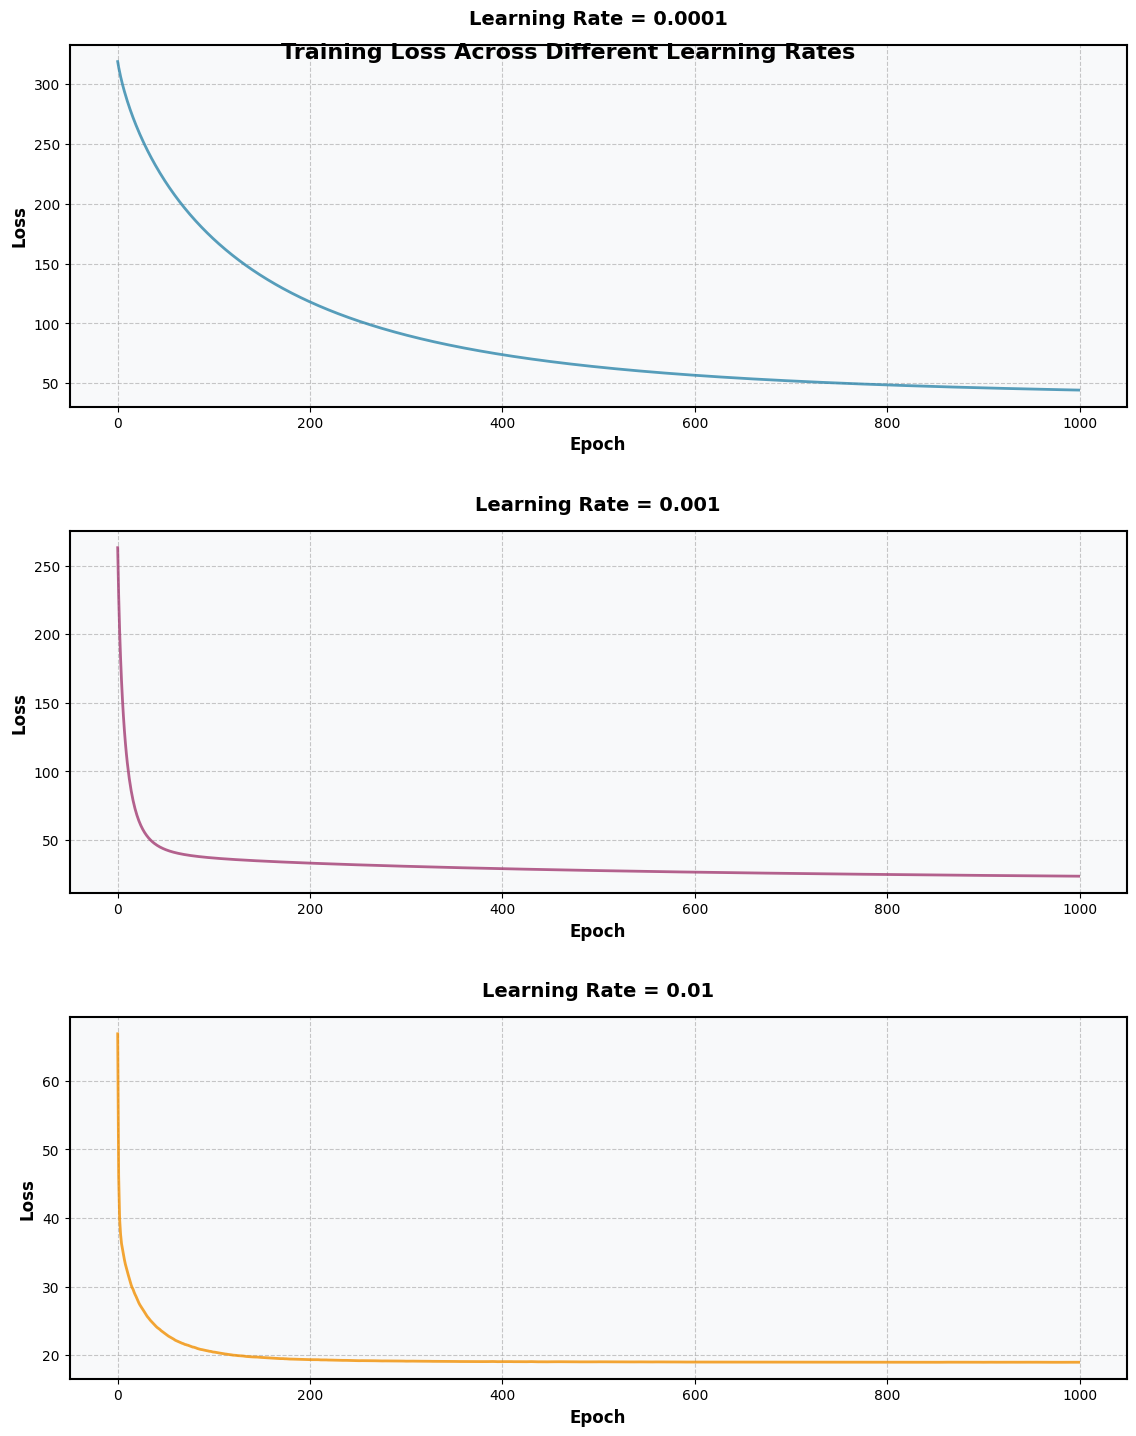

In [62]:
#s9si madame 3lech flbday maybdouch kifkif LOSS because it is random
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(3, 1, figsize=(12, 15))
colors = ['#2E86AB', '#A23B72', '#F18F01']
epochs = np.arange(0, 1000)

plot_params = {
    'linewidth': 2,
    'alpha': 0.8
}

grid_params = {
    'linestyle': '--',
    'alpha': 0.7
}

# LOOP
for i, (loss, lr, color) in enumerate(zip(
    [loss_history, loss_history_1, loss_history__2],
    ['0.0001', '0.001', '0.01'],
    colors
)):

    axs[i].plot(epochs, loss, color=color, **plot_params)
    
    axs[i].set_xlabel('Epoch', fontsize=12, fontweight='bold')
    axs[i].set_ylabel('Loss', fontsize=12, fontweight='bold')
    axs[i].set_title(f'Learning Rate = {lr}', fontsize=14, fontweight='bold', pad=15)
    
    axs[i].grid(True, **grid_params)
    
    for spine in axs[i].spines.values():
        spine.set_linewidth(1.5)
    
    axs[i].tick_params(axis='both', which='major', labelsize=10)
    
    axs[i].set_facecolor('#f8f9fa')

plt.tight_layout(pad=3.0)

fig.suptitle('Training Loss Across Different Learning Rates', 
             fontsize=16, 
             fontweight='bold', 
             y=0.95)

plt.show()

In [63]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

learning_rates = ['0.0001', '0.001', '0.01']
predictions = [y_pred, y_pred_, y_pred__]

print("\nModel Evaluation Metrics:")
print("-" * 50)

for lr, pred in zip(learning_rates, predictions):
    print(f"\nLearning Rate: {lr}")
    print(f"MAE:  {mean_absolute_error(y_test, pred):.4f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_test, pred)):.4f}")
    print(f"MSE:  {mean_squared_error(y_test, pred):.4f}")
    print(f"R2:   {r2_score(y_test, pred):.4f}")


Model Evaluation Metrics:
--------------------------------------------------

Learning Rate: 0.0001
MAE:  6.1628
RMSE: 9.4065
MSE:  88.4822
R2:   -0.0490

Learning Rate: 0.001
MAE:  4.2186
RMSE: 6.8576
MSE:  47.0260
R2:   0.4425

Learning Rate: 0.01
MAE:  3.8743
RMSE: 6.1584
MSE:  37.9261
R2:   0.5504


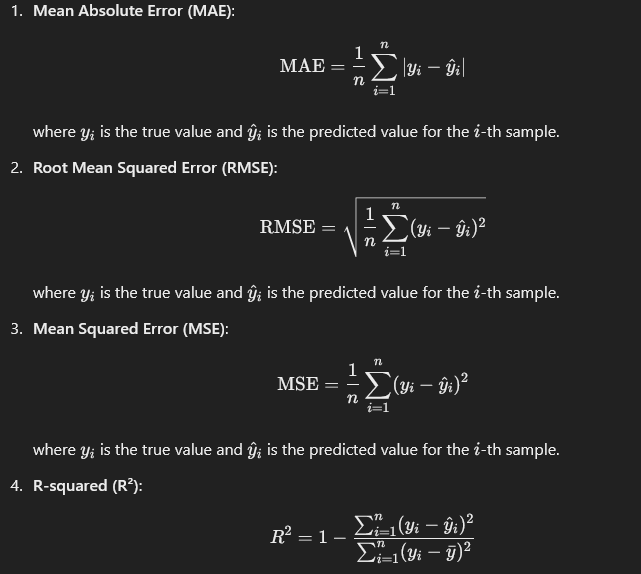

In [64]:
[theta_0, theta_1] = sgdr__.coef_
intercept = sgdr__.intercept_

In [65]:
x = data['RM']
y = data['LSTAT']
z = theta_0 * x + theta_1 * y + intercept

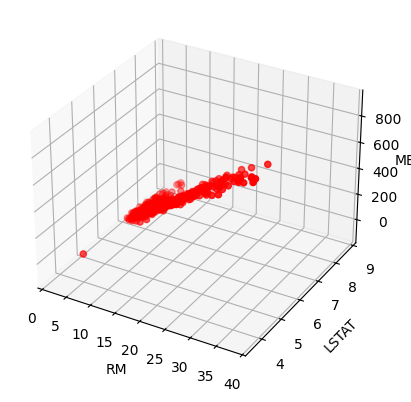

In [66]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(y, x, z, c='red')
ax.set_xlabel('RM')
ax.set_ylabel('LSTAT')
ax.set_zlabel('MEDV')
plt.show()

In [67]:
fig = px.scatter_3d(x=x, y=y, z=z)
fig.update_layout(scene={
    'xaxis_title': "RM",
    'yaxis_title': "LSTAT",
    'zaxis_title': "MEDS (predicted)",
})
fig.show()

In [68]:
def predict(instance):
    return (theta_0 * instance['RM'] + theta_1 * instance['LSTAT'] + intercept)[0]

In [69]:
instance = pd.Series({
    'CRIM': 1.13081,
    'ZN': 0.0,
    'INDUS': 8.14,
    'CHAS': 0.0,
    'NOX': 0.538,
    'RM': 5.713,
    'AGE': 94.1,
    'DIS': 4.233,
    'RAD': 4.0,
    'TAX': 307.0,
    'PTRATIO': 21.0,
    'B': 360.17,
    'LSTAT': 22.6,
})

In [70]:
print(predict(instance))

479.62721448216917
